<a href="https://colab.research.google.com/github/maxwellfundi/AI-Course-2024/blob/main/2_SOM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Self-Organizing Map (SOM) with MNIST Dataset


In this exercise, we'll implement and visualize a Self-Organizing Map (SOM) using the MNIST dataset, which consists of handwritten digits. We'll use the `minisom` Python library for SOM and process the MNIST data.

### Steps:
1. **Explanation of SOM and Key Formulas**: We'll explain the key formulas used in SOM.
2. **Load and preprocess MNIST dataset**.
3. **Train a Self-Organizing Map (SOM)** using `minisom`.
4. **Visualize the SOM** using the trained weights.

    

### 1. Explanation of SOM and Key Formulas

Self-Organizing Maps (SOM), also known as Kohonen maps, are unsupervised neural networks that map high-dimensional data onto a lower-dimensional (usually 2D) grid. The main goal is to preserve the topological structure of the input data.

#### Key Concepts:
- **Neuron Update Rule**: During training, the SOM updates the weight vectors of the best-matching unit (BMU) and its neighbors:
  
  $$
  w_{i}(t+1) = w_{i}(t) + \eta(t) \cdot h_{ci}(t) \cdot (x(t) - w_{i}(t))
  $$

  Where:
  - $w_{i}(t)$ is the weight vector of neuron $i$ at time $t$,
  - $x(t)$ is the input vector at time $t$,
  - $\eta(t)$ is the learning rate,
  - $h_{ci}(t)$ is the neighborhood function that decreases with distance from the BMU $c$.

- **Best Matching Unit (BMU)**: The neuron whose weight vector is closest to the input vector is updated along with its neighbors. This is calculated as:

  $$
  c = \arg\min_{i} \|x - w_i\|
  $$

  Where $c$ is the BMU and $\|x - w_i\|$ is the Euclidean distance between the input vector and the weight vector of neuron $i$.



### 2. Load and Preprocess the MNIST Dataset

We will use the MNIST dataset of handwritten digits to train the SOM. You can use the `torchvision` library to load and preprocess MNIST.
    

In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=7f8c6ba24166bf1fbea6742f55d62ab253f0014482a1a8a1b3d8e09dee2cada1
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [3]:

import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Download and load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Flatten images and convert to numpy arrays
mnist_data = mnist_trainset.data.numpy()
mnist_labels = mnist_trainset.targets.numpy()
mnist_data = mnist_data.reshape(mnist_data.shape[0], -1) / 255.0  # Normalize pixel values

print(f"MNIST dataset shape: {mnist_data.shape}")


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 61621672.74it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 33912568.26it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 53344837.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 916419.51it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



MNIST dataset shape: (60000, 784)


### 3. Train the Self-Organizing Map (SOM)

In [4]:
from sklearn.decomposition import PCA
from minisom import MiniSom
import numpy as np

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Use a fixed number of components, e.g., 50
mnist_data_reduced = pca.fit_transform(mnist_data)

# Initialize SOM
som_size = 30  # SOM grid size (30x30)
som = MiniSom(som_size, som_size, input_len=mnist_data_reduced.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize weights
som.random_weights_init(mnist_data_reduced)
print("SOM weights initialized.")

# Train SOM with a fixed number of iterations
num_iterations = 20000  # Total number of iterations
print("Training SOM...")

# Train SOM using the entire dataset for each iteration
som.train_random(mnist_data_reduced, num_iterations)

print("SOM training complete.")


SOM weights initialized.
Training SOM...
SOM training complete.


### 4. Visualize the SOM

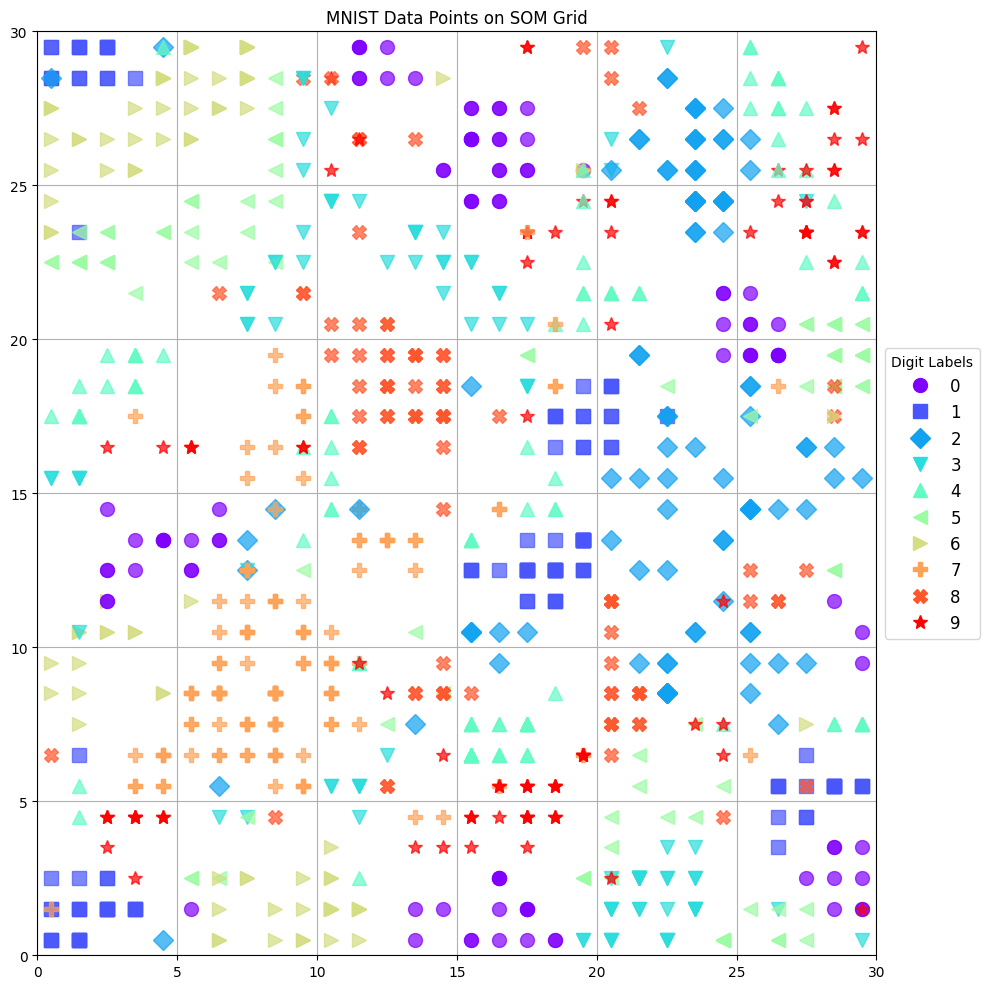

In [5]:
# Plot the SOM to visualize digit clusters with colors and a legend for labels
plt.figure(figsize=(10, 10))

# Color map for digits 0-9
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Define different marker styles for each digit
markers = ['o', 's', 'D', 'v', '^', '<', '>', 'P', 'X', '*']  # Different shapes for each digit

# Create a scatter plot with different colors and shapes for each digit
for i, x in enumerate(mnist_data_reduced[:1000]):  # Plot only the first 1000 points for clarity
    w = som.winner(x)  # Find the BMU for each data point
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[mnist_labels[i]], markerfacecolor=colors[mnist_labels[i]],
             markeredgecolor=colors[mnist_labels[i]], markersize=10, alpha=0.7)

# Add a legend for each digit (0-9), using different marker shapes
for digit, (color, marker) in enumerate(zip(colors, markers)):
    plt.plot([], [], marker=marker, label=str(digit), color=color, markersize=10, linestyle='None')

# Add grid and customize the legend
plt.title('MNIST Data Points on SOM Grid')
plt.xlim([0, som_size])
plt.ylim([0, som_size])
plt.grid(True)

# Move the legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Digit Labels', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()
